<body>
    <h1 align="center";font-size:40px> Regression</h1>
    <div style="text-align:center" class="caption">
      <img src='./regression.png' border="1.5" alt='regression' width="300"/>
    </div>
</body>

<h1>Regression</h1>
<p style="margin-bottom:0; margin : 0; padding-top:0;">The term regression is used when you try to find the relationship between variables.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events.</p>
<hr>

[Linear Regression](#LinearRegression)         <br>
[Polynomial Regression](#PolynomialRegression) <br>
[Multiple Regression](#MultipleRegression)     <br>
[Scale](#Scale)                                <br>
[Test/Train](#TestTrain) 

<a id="LinearRegression"></a>
<h1>Linear Regression</h1>
<p style="margin-bottom:0; margin : 0; padding-top:0;">Linear regression uses the relationship between the data-points to draw a straight line through 
all them.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">This line can be used to predict future values.</p>


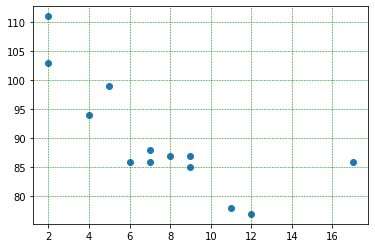

In [1]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

<h2>How Does it Work?</h2>
<p style="margin-bottom:0; margin : 0; padding-top:0;">Python has methods for finding a relationship between data-points and to draw a line of linear regression. We will show you 
how to use these methods instead of going through the mathematic formula.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">In the example below, the x-axis represents age, and the y-axis represents speed. We have registered the age and speed of 13 cars as they were passing a 
tollbooth. Let us see if the data we collected could be used in a linear 
regression:</p>

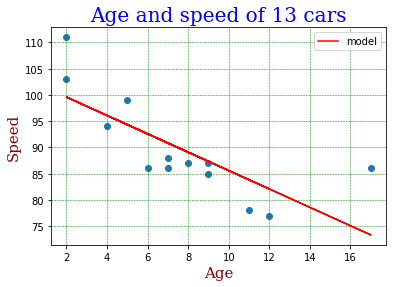

In [2]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

#Execute a method that returns some important key values of Linear Regression:
slope, intercept, r, p, std_err = stats.linregress(x, y)

#Create a function that uses the slope and intercept values to return a new value. This new value represents where on the y-axis the corresponding x value will be placed:
def myfunc(x):
    return slope * x + intercept

#Run each value of the x array through the function. This will result in a new array with new values for the y-axis:
mymodel = list(map(myfunc, x))

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Draw the original scatter plot:
plt.scatter(x, y)
#Draw the line of linear regression:
plt.plot(x, mymodel,c='r',label='model' )
plt.title("Age and speed of 13 cars",fontdict = font1)
plt.xlabel("Age",fontdict = font2)
plt.ylabel("Speed",fontdict = font2)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

In [3]:
for i,y_hat in enumerate(mymodel):
    print('({:2},{:3}), y_hat={:0.8}, Error = {:0.8}'.format(x[i],y[i],y_hat, y[i]-y_hat))

( 5, 99), y_hat=94.349522, Error = 4.6504783
( 7, 86), y_hat=90.846946, Error = -4.8469463
( 8, 87), y_hat=89.095659, Error = -2.0956586
( 7, 88), y_hat=90.846946, Error = -2.8469463
( 2,111), y_hat=99.603385, Error = 11.396615
(17, 86), y_hat=73.334069, Error = 12.665931
( 2,103), y_hat=99.603385, Error = 3.3966152
( 9, 87), y_hat=87.344371, Error = -0.34437086
( 4, 94), y_hat=96.100809, Error = -2.1008094
(11, 78), y_hat=83.841795, Error = -5.8417954
(12, 77), y_hat=82.090508, Error = -5.0905077
( 9, 85), y_hat=87.344371, Error = -2.3443709
( 6, 86), y_hat=92.598234, Error = -6.598234


<h2>R for Relationship</h2>
<p style="margin-bottom:0; margin : 0; padding-top:0;">It is important to know how the relationship between the values of the x-axis and the values of the y-axis is, if there are no relationship the linear regression can not be used to predict anything.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">This relationship - the coefficient of correlation - is called <b>r</b>.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">The <b>r</b> value ranges from -1 to 1, where 0 means no relationship, and 1  (and -1) means 100% related.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">Python and the Scipy module will compute this value for you, all you have to do is feed it with the x and y values.</p>

In [4]:
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)
#Note: The result -0.76 shows that there is a relationship, not perfect, but it indicates that we could use linear regression in future predictions.

-0.758591524376155


<h2>Predict Future Values</h2>

<p style="margin-bottom:0; margin : 0; padding-top:0;">Now we can use the information we have gathered to predict future values.</p>

<p style="margin-bottom:0; margin : 0; padding-top:0;">Example: Let us try to predict the speed of a 10 years old car.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">To do so, we need the same <b> myfunc()</b> function 
from the example above:</p>

In [5]:
speed = myfunc(10)
print(speed)

85.59308314937454


<h2>Bad Fit?</h2>

<p style="margin-bottom:0; margin : 0; padding-top:0;">Let us create an example where linear regression would not be the best method 
to predict future values.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">These values for the x- and y-axis should result in a very bad fit for linear 
  regression:</p>

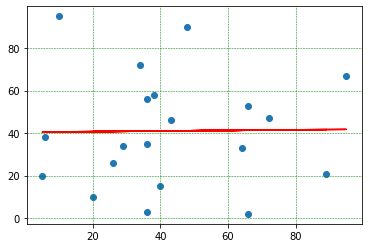

In [6]:
import matplotlib.pyplot as plt
from scipy import stats

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel,c='r')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

<p>And the <b>r</b> for relationship?</p>

In [7]:
import numpy
from scipy import stats

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)
#The result: 0.013 indicates a very bad relationship, and tells us that this data set is not suitable for linear regression.

0.01331814154297491


<a id="PolynomialRegression"></a>
<h1>Polynomial Regression</h1>

<p  style="margin-bottom:0; margin : 0; padding-top:0;">If your data points clearly will not fit a linear regression (a straight line 
through all data points), it might be ideal for polynomial regression.</p>
<p  style="margin-bottom:0; margin : 0; padding-top:0;">Polynomial regression, like linear regression, uses the relationship between the 
variables x and y to find the best way to draw a line through the data points.</p>

<h2>How Does it Work?</h2>
<p style="margin-bottom:0; margin : 0; padding-top:0;">Python has methods for finding a relationship between data-points and to draw 
a line of polynomial regression. We will show you how to use these methods 
instead of going through the mathematic formula.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">In the example below, we have registered 18 cars as they were passing a 
certain tollbooth.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">We have registered the car's speed, and the time of day (hour) the passing 
occurred.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">The x-axis represents the hours of the day and the y-axis represents the 
speed:</p>

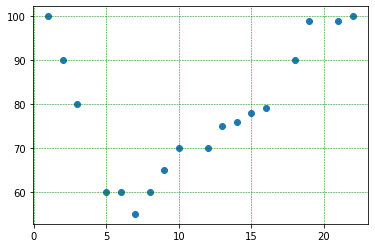

In [8]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

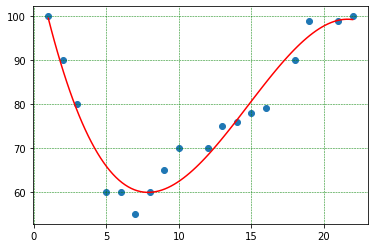

In [9]:
import numpy
import matplotlib.pyplot as plt

#Create the arrays that represent the values of the x and y axis:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

#NumPy has a method that lets us make a polynomial degree 3 model:
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

# Then specify how the line will display, we start at position 1, and end at position 22:
myline = numpy.linspace(1, 22, 100)

# Draw the original scatter plot:
plt.scatter(x, y)
# Draw the line of polynomial regression:
plt.plot(myline, mymodel(myline), c='r')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

<h2>R-Squared</h2>
<p>It is important to know how well the relationship between the values of the 
x- and y-axis is, if there are no relationship the 
polynomial 
regression can not be used to predict anything.</p>
<p>The relationship is measured with a value called the r-squared.</p>
<p>The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 
means 100% related.</p>
<p>Python and the Sklearn module will compute this value for you, all you have to 
do is feed it with the x and y arrays:</p>

In [10]:
import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))
# Note: The result 0.94 shows that there is a very good relationship, and we can use polynomial regression in future predictions.0

0.9432150416451026


<h2>Predict Future Values</h2>
<p style="margin-bottom:0; margin : 0; padding-top:0;">Now we can use the information we have gathered to predict future values.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">Example: Let us try to predict the speed of a car that passes the tollbooth 
at around the time 17:00:</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">To do so, we need the same <code class="ma">mymodel</code> array 
from the example above:</p>

In [11]:
speed = mymodel(17)
print(speed)

88.87331269698001


<h2>Bad Fit?</h2>
<p>Let us create an example where polynomial regression would not be the best method 
to predict future values.</p>

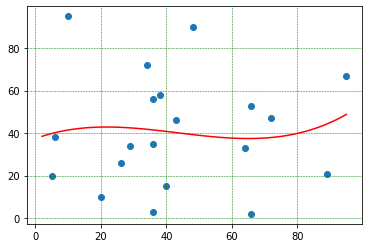

In [12]:
import numpy
import matplotlib.pyplot as plt

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(2, 95, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline), c='r')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

<p>And the r-squared value?</p>

In [13]:
import numpy
from sklearn.metrics import r2_score

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))
# The result: 0.00995 indicates a very bad relationship, and tells us that this data set is not suitable for polynomial regression.

0.009952707566680652


<a id="MultipleRegression"></a>

<h1>Multiple Regression</h1>

<p style="margin-bottom:0; margin : 0; padding-top:0;">Multiple regression is like linear regression</a>, but with more than one 
independent value, meaning that we try to predict a value based on <strong>two 
or more</strong> variables.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">Take a look at the data set below, it contains some information about cars.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">We can predict the CO2 emission of a car based on 
the size of the engine, but with multiple regression we can throw in more 
variables, like the weight of the car, to make the prediction more accurate.</p>


<h2>How Does it Work?</h2>
<p style="margin-bottom:0; margin : 0; padding-top:0;">In Python we have modules that will do the work for us. Start by importing 
the Pandas module.</p>
<a id="HowItWorks_ID"><a>

In [20]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("..\data\car_data.csv")
# Then make a list of the independent values and call this variable X.
# Put the dependent values in a variable called y.
# Tip: It is common to name the list of independent values with a upper case X, and the list of dependent values with a lower case y.
X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X.values, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)
# We have predicted that a car with 1.3 liter engine, and a weight of 2300 kg, will release approximately 107 grams of CO2 for every kilometer it drives.


[107.2087328]


In [21]:
df.head(5)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


<h2>Coefficient</h2>
<p style="margin-bottom:0; margin : 0; padding-top:0;">The coefficient is a factor that describes the relationship 
with an unknown variable.</p>

In [24]:
print(regr.coef_)

[0.00755095 0.00780526]


<h2>Result Explained</h2>

<p style="margin-bottom:0; margin : 0; padding-top:0;">The result array represents the coefficient values of weight and volume.</p>
<p>Weight: 0.00755095<br>
Volume: 0.00780526</p>

<p style="margin-bottom:0; margin : 0; padding-top:0;">These values tell us that if the weight increase by 1kg, the CO2 
emission increases by 0.00755095g.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">And if the engine size (Volume) increases by 1 cm<sup>3</sup>, the CO2 emission 
increases by 0.00780526 g.</p>

<p style="margin-bottom:0; margin : 0; padding-top:0;">I think that is a fair guess, but let test it!</p>

<p style="margin-bottom:0; margin : 0; padding-top:0;">We have already predicted that if a car with a 1300cm<sup>3</sup> engine weighs 2300kg, the CO2 emission will be approximately 107g.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">What if we increase the weight with 1000kg?</p>

In [25]:
predictedCO2 = regr.predict([[3300, 1300]])
print(predictedCO2)

[114.75968007]


<p style="margin-bottom:0; margin : 0; padding-top:0;">
We have predicted that a car with 1.3 liter engine, and a weight of 
3300 kg, will release approximately 115 grams of CO2 for every kilometer it drives.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">
Which shows that the coefficient of 0.00755095 is correct:</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">
107.2087328 + (1000 * 0.00755095) = 114.75968</p>


<a id="Scale"></a>

<h1>Scale</h1>
<hr>

<h2>Scale Features</h2>
<p style="margin-bottom:0; margin : 0; padding-top:0;">When your data has different values, and even different measurement units, it can be difficult to compare them. What is kilograms compared to meters? Or altitude compared to time?</p>

<p style="margin-bottom:0; margin : 0; padding-top:0;">The answer to this problem is scaling. We can scale data into new values that are easier to 
compare.</p>


<p style="margin-bottom:0; margin : 0; padding-top:0;">Take a look at the table below, it is the same data set that we used in the multiple regression chapter, but this time the <strong>volume</strong> column 
contains values in<em> liters</em> instead of <em>cm<sup>3</sup></em> (1.0 instead of 1000).</p>


In [26]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("..\data\car_data.csv")
df.head(5)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


<p style="margin-bottom:0; margin : 0; padding-top:0;">It can be difficult to compare the volume 1.0 with the weight 790, but if we 
scale them both into comparable values, we can easily see how much one value 
is compared to the other.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">There are different methods for scaling data, in this tutorial we will use a 
method called standardization.</p>


<p style="margin-bottom:0; margin : 0; padding-top:0;">The standardization method  
uses this formula:</p>

<p style="margin-bottom:0; margin : 0; padding-top:0;"><code class="codespan">z = (x - u) / s</code></p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">Where <code class="codespan">z</code> is the new value, 
<code class="codespan">x</code> is the original value, 
<code class="codespan">u</code> is the mean and <code class="codespan">s</code> is the 
standard deviation.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">If you take the <strong>weight</strong> column from the data set above, the first value 
is 790, and the scaled value will be:</p>

<code class="codespan">(790 - <a target="_blank" href="trypandas.asp?filename=demo_ml_scale_mean1">1292.23</a>) / <a target="_blank" href="trypandas.asp?filename=demo_ml_scale_std1">238.74</a> = -2.1</code>

<p style="margin-bottom:0; margin : 0; padding-top:0;">If you take the <strong>volume</strong> column from the data set above, the first value 
is 1.0, and the scaled value 
will be:</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;"><code class="codespan">(1.0 - <a target="_blank" href="trypandas.asp?filename=demo_ml_scale_mean2">1.61</a>) / <a target="_blank" href="trypandas.asp?filename=demo_ml_scale_std2">0.38</a> = -1.59</code></p>

<p style="margin-bottom:0; margin : 0; padding-top:0;">Now you can compare -2.1 with -1.59 instead of comparing 790 with 1.0.</p>

<p style="margin-bottom:0; margin : 0; padding-top:0;">You do not have to do this manually,
the Python sklearn module has a method called <code class="codespan">StandardScaler()</code>
which returns a Scaler object with methods for transforming data sets.</p>


In [27]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


X = df[['Weight', 'Volume']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


<h2>Predict CO2 Values</h2>

<p style="margin-bottom:0; margin : 0; padding-top:0;">The task in the <a id="MultipleRegression">Multiple Regression chapter</a> was to predict the CO2 emission from a car 
when you only knew its weight and volume.</p>

<p style="margin-bottom:0; margin : 0; padding-top:0;">When the data set is scaled, you will have to use the scale when you predict values:</p>


In [28]:
# Predict the CO2 emission from a 1.3 liter car that weighs 2300 kilograms

import pandas
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


X = df[['Weight', 'Volume']]
y = df['CO2']

X = X.values
y = y.values

scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)

[97.07204485]


<a id="TestTrain"></a>
<h1>Train/Test</h1>
<h2>Evaluate Your Model</h2>

<p style="margin-bottom:0; margin : 0; padding-top:0;">In Machine Learning we create models to predict the outcome of certain events,
like in the previous chapter where we predicted the CO2 emission of a car when we knew
the weight and engine size.</p>

<p style="margin-bottom:0; margin : 0; padding-top:0;">To measure if the model is good enough, we can use a method called Train/Test.</p>

<hr>

<h2>What is Train/Test</h2>

<p style="margin-bottom:0; margin : 0; padding-top:0;">Train/Test is a method to measure the accuracy of your model.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">It is called Train/Test because you split the data set into two sets: a training set and a testing set.</p>

  <p style="margin-bottom:0; margin : 0; padding-top:0;"> <span style="background-color:#C791C7; color:black"> 80% for training, and 20% for testing.</span></p>

<p style="margin-bottom:0; margin : 0; padding-top:0;">You <em>train</em> the model using the training set.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">You <em>test</em> the model using the testing set.</p>


<p style="margin-bottom:0; margin : 0; padding-top:0;"><span style="background-color:#00ffff; color:black"><em>Train</em> the model means <em>create</em> the model.</span></p>
<p style="margin-bottom:0; margin : 0; padding-top:0;"><span style="background-color:#00ffff; color:black"><em>Test</em> the model means test the accuracy of the model.</span></p>

<hr>

<h2>Start With a Data Set</h2>

<p style="margin-bottom:0; margin : 0; padding-top:0;">Start with a data set you want to test.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">Our data set illustrates 100 customers in a shop, and their shopping habits.</p>


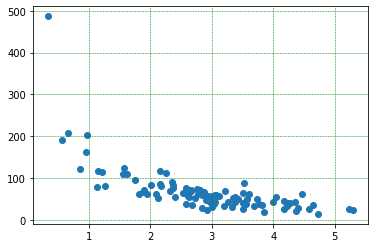

In [29]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

# The x axis represents the number of minutes before making a purchase.
# The y axis represents the amount of money spent on the purchase.



# To get a Normal Data Distribution.It has three parameters: numpy.random.normal(loc, scale,size)
#     loc - (Mean) where the peak of the bell exists.
#     scale - (Standard Deviation) how flat the graph distribution should be.
#     size - The shape of the returned array.


x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

<h2>Split Into Train/Test</h2>

<p style="margin-bottom:0; margin : 0; padding-top:0;">The <em>training</em> set should be a random selection of 80% of the original data.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">The <em>testing</em> set should be the remaining 20%.</p>


In [30]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

<h2>Display the Training Set</h2>
<p style="margin-bottom:0; margin : 0; padding-top:0;">Display the same scatter plot with the training set:</p>

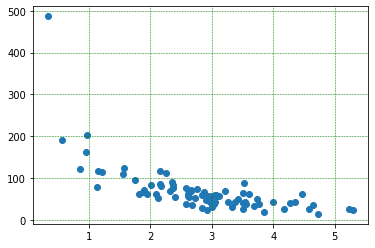

In [31]:
plt.scatter(train_x, train_y)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

<h2>Display the Testing Set</h2>
<p style="margin-bottom:0; margin : 0; padding-top:0;">To make sure the testing set is not completely different, we will take a look at the testing set as well.</p>

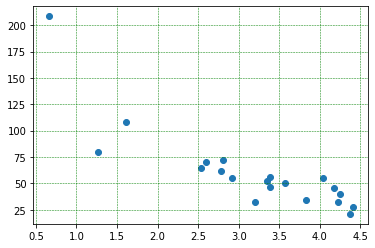

In [32]:
plt.scatter(test_x, test_y)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()
# The testing set also looks like the original data set:

<h2>Fit the Data Set</h2>
<p style="margin-bottom:0; margin : 0; padding-top:0;">What does the data set look like? In my opinion I think the best fit would be 
a polynomial regression, so let us draw a line of polynomial regression.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">To draw a line through the data points, we use the <code class="codespan">
plot()</code> method of the matplotlib module:</p>

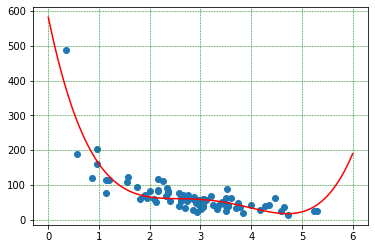

In [33]:
# Draw a polynomial regression line through the data points:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline),c='r')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

<p style="margin-bottom:0; margin : 0; padding-top:0;">The result can back my suggestion of the data set fitting a polynomial 
regression, even though it would give us some weird results if we try to predict 
values outside of the data set. Example: the line indicates that a customer 
spending 6 minutes in the shop would make a purchase worth 200. That is probably 
a sign of overfitting.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">But what about the R-squared score? The R-squared score is a good indicator 
of how well my data set is fitting the model.</p>

<h2>R2</h2>
<p style="margin-bottom:0; margin : 0; padding-top:0;">Remember R2, also known as R-squared?</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">It measures the relationship between the x axis and the y 
axis, and the value ranges from 0 to 1, where 0 means no relationship, and 1 
means totally related.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">The sklearn module has a method called <code class="codespan">r2_score()</code> 
that will help us find this relationship.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">In this case we would like to measure the relationship  
between the minutes a customer stays in the shop and how much money they spend.</p>

In [34]:
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(train_y, mymodel(train_x))

print(r2)
# Note: The result 0.799 shows that there is a OK relationship.

0.7988645544629797


<h2>Bring in the Testing Set</h2>

<p style="margin-bottom:0; margin : 0; padding-top:0;">Now we have made a model that is OK, at least when it comes to training data.</p>
<p style="margin-bottom:0; margin : 0; padding-top:0;">Now we want to test the model with the testing data as well, to see if gives us the 
same result.</p>

In [35]:
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(test_y, mymodel(test_x))

print(r2)
# Note: The result 0.809 shows that the model fits the testing set as well, and we are confident that we can use the model to predict future values.

0.8086921460343581


<h2>Predict Values</h2>
<p style="margin-bottom:0; margin : 0; padding-top:0;">Now that we have established that our model is OK, we can start predicting 
new values.</p>

In [36]:
# Example:
#     How much money will a buying customer spend, if she or he stays in the shop for 5 minutes?

print(mymodel(5))
# The example predicted the customer to spend 22.88 dollars, as seems to correspond to the diagram:

22.87962591811811
